# Day 28 – Exploratory Data Analysis on Heart Disease Dataset

## 1. Introduction to the Dataset
The dataset used in this notebook contains medical information and test results for patients, along with a target column indicating the presence of heart disease.
The objective is to explore the data, identify patterns, detect anomalies, and extract insights that could help in understanding factors influencing heart disease.

---
## 2. What is EDA (Exploratory Data Analysis)?
**EDA is the process of examining a dataset to:**
- Understand its structure and characteristics
- Identify patterns, trends, and anomalies
- Formulate hypotheses for further analysis or modeling
**EDA typically involves:**
- Data collection & loading
- Cleaning and preprocessing
- Descriptive statistics
- Data visualization
- Correlation analysis

---
## 3. Types of EDA
**EDA can be broadly divided into four main types:**

**1. Univariate Analysis**
- Examines a single variable at a time.
- Helps understand the distribution, central tendency, and spread of the data.
- Tools: histograms, boxplots, bar charts, frequency tables.

**2. Bivariate Analysis**
- Studies the relationship between two variables.
- Often used to determine if one variable affects or correlates with another.
- Tools: scatterplots, grouped bar charts, correlation coefficients.

**3. Multivariate Analysis**
- Involves the simultaneous analysis of three or more variables.
- Useful for finding complex patterns and interactions.
- Tools: pairplots, heatmaps, 3D plots, advanced statistical models.

**4. Graphical Analysis**
- Focuses on visual representation of data for better insight.
- Helps spot patterns, trends, and outliers quickly.
- Tools: matplotlib, seaborn, plotly, etc.

---

## 4. Goals of This Analysis
**In this project, the main aims are:**
- To understand the dataset's structure and data types
- To check for missing values and duplicates
- To analyze numerical and categorical variables
- To explore relationships between features
- To visualize patterns using plots
- To derive meaningful insights for potential model building

---


## 5. Import Libraries

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

sns.set(style="whitegrid")

In [2]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

## 6. Import Dataset

In [3]:
df = pd.read_csv(r'C:\Users\Arman\Downloads\dataset/heart.csv')

## 7. Exploratory Data Analysis

### Check the shape of the dataset

In [4]:
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (303, 14)


### Preview the dataset

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Dataset Information
**Typical columns in the Heart Disease dataset include:**
- age – Age of the patient
- sex – Gender (1 = male, 0 = female)
- cp – Chest pain type (categorical: 0–3)
- trestbps – Resting blood pressure (mm Hg)
- chol – Serum cholesterol (mg/dl)
- fbs – Fasting blood sugar (>120 mg/dl) (1 = true, 0 = false)
- restecg – Resting electrocardiographic results (0–2)
- thalach – Maximum heart rate achieved
- exang – Exercise induced angina (1 = yes, 0 = no)
- oldpeak – ST depression induced by exercise
- slope – Slope of the peak exercise ST segment (0–2)
- ca – Number of major vessels colored by fluoroscopy (0–3)
- thal – Thalassemia type (categorical: 1–3)
- target – Heart disease diagnosis (1 = disease present, 0 = no disease)



### Check the datatype of columns

The above df.info() command gives us the number of filled values along with the data types of columns.

If we simply want to check the data type of a particular column, we can use the following command.

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Important Points About the Dataset
- `sex` is a character variable. Its data type should be object. But it is encoded as (1 = male; 0 = female). So, its data type is given as int64.

- Same is the case with several other variables - `fbs`, `exang` and `target`.

- `fbs (fasting blood sugar)` should be a character variable as it contains only 0 and 1 as values (1 = true; 0 = false). As it contains only 0 and 1 as values, so its data type is given as int64.

- `exang (exercise induced angina)` should also be a character variable as it contains only 0 and 1 as values (1 = yes; 0 = no). It also contains only 0 and 1 as values, so its data type is given as int64.

- `target` should also be a character variable. But, it also contains 0 and 1 as values. So, its data type is given as int64.

### Statistical properties of dataset

In [8]:
# statistical properties of dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Important points to note about df.describe()


- The command `df.describe()` helps us to view the statistical properties (like mean, std, min, max) of numerical variables. It excludes character variables.

- If we want to view the statistical properties of character variables, we should run the following command -

     `df.describe(include=['object'])`
     
- If we want to view the statistical properties of all the variables, we should run the following command -

     `df.describe(include='all')`  

### View column names

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## 8. Univariate Analysis
**Univariate analysis examines one feature at a time:**
1. For numerical columns:
- .describe() for summary statistics (mean, median, std, min, max)
- Histograms and boxplots to understand distribution and detect outliers

2. For categorical columns:
- .value_counts() to check frequency distribution
- Bar plots to visualize counts

---

### Analysis of `target` feature variable


- Our feature variable of interest is `target`.

- It refers to the presence of heart disease in the patient.

- It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).

- So, in this section, I will analyze the `target` variable. 

### Number of unique values

In [10]:
df['target'].nunique()

2

We can see that there are 2 unique values in the `target` variable.

### View Unique Values

In [11]:
df['target'].unique()

array([1, 0])

So, the unique values are 1 and 0. (1 stands for presence of heart disease and 0 for absence of hear disease).

### Frequency Distribution

In [12]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

- `1` stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

- Similarly, `0` stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

- We can visualize this information below.

### Visualize Frequency Distribution

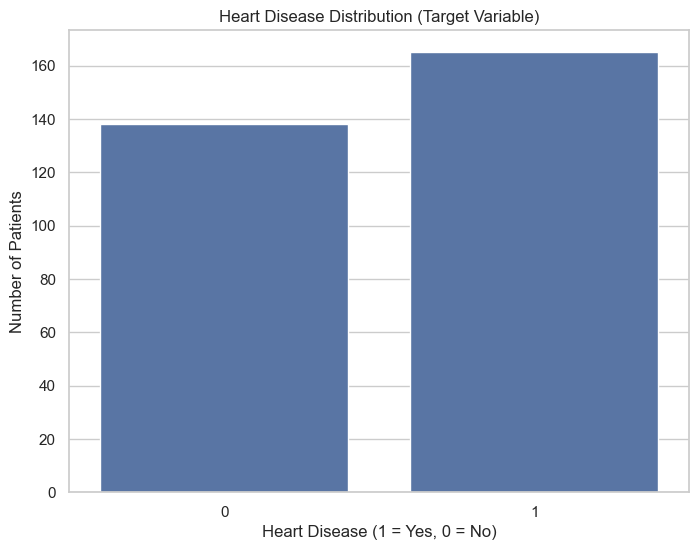

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution (Target Variable)")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Number of Patients")
plt.show()

**The above plot confirms the findings that -**

   - There are 165 patients suffering from heart disease, and 
   
   - There are 138 patients who do not have any heart disease.

**Target Variable with Other Features**

### Frequency Distribution of Target by Sex

In [14]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

- `sex` variable contains two integer values 1 and 0 : (1 = male; 0 = female).

- `target` variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

-  So, out of 96 females - 72 have heart disease and 24 do not have heart disease.

- Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.


### Visualize value counts of the sex variable wrt target

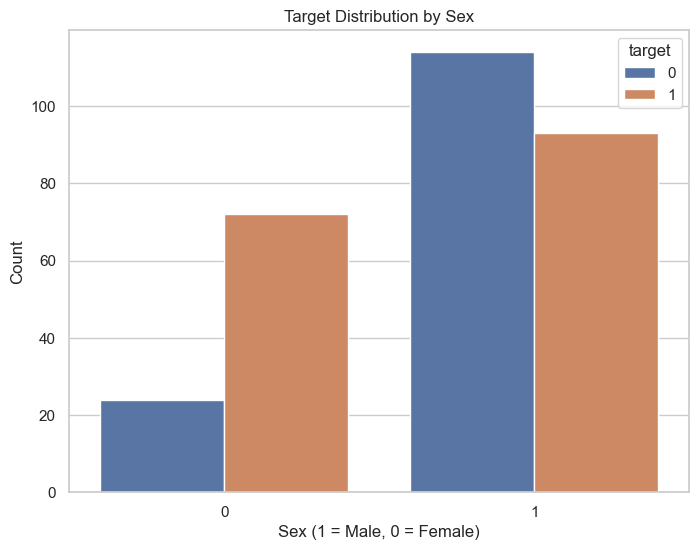

In [15]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.title("Target Distribution by Sex")
plt.xlabel("Sex (1 = Male, 0 = Female)")
plt.ylabel("Count")
plt.show()

- You can see that the values of `target` variable are plotted wrt `sex` : (1 = male; 0 = female).

- `target` variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- The above plot confirms our findings that -

    - Out of 96 females - 72 have heart disease and 24 do not have heart disease.

    - Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

### Alternate Visualization – Side-by-Side Columns

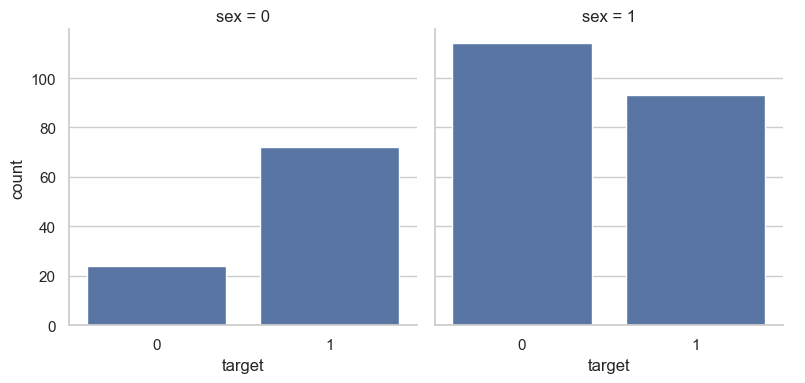

In [16]:
ax = sns.catplot(x="target", col="sex", data=df, kind="count", height=4, aspect=1)
plt.show()

- The above plot segregate the values of `target` variable and plot on two different columns labelled as (sex = 0, sex = 1).

- It is more convinient way of interpret the plots.

### Horizontal Bars

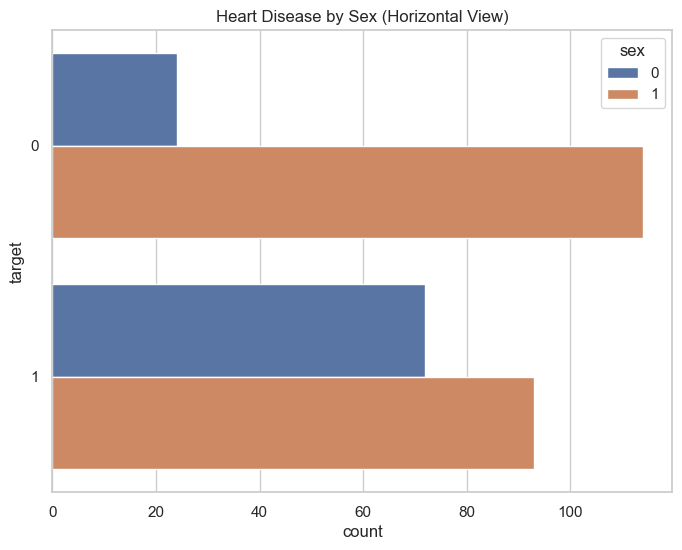

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="target", hue="sex", data=df)
plt.title("Heart Disease by Sex (Horizontal View)")
plt.show()

### Using Different Color Palette

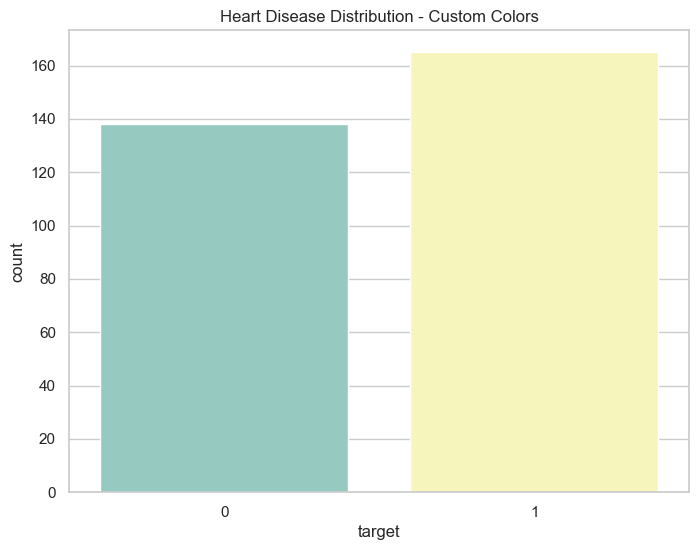

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, palette="Set3")
plt.title("Heart Disease Distribution - Custom Colors")
plt.show()

### Using `plt.bar` keyword arguments for a different look 

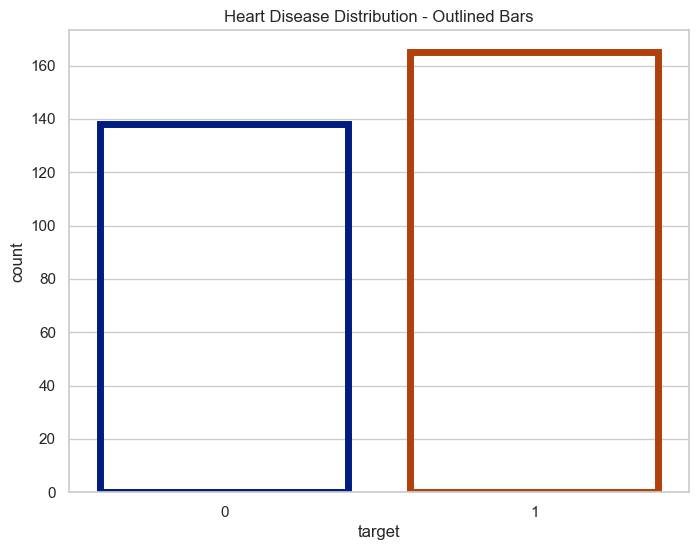

In [19]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.title("Heart Disease Distribution - Outlined Bars")
plt.show()

- I have visualize the `target` values distribution wrt `sex`. 

- We can follow the same principles and visualize the `target` values distribution wrt `fbs (fasting blood sugar)` and `exang (exercise induced angina)`.

### Target Distribution wrt fbs (Fasting Blood Sugar)

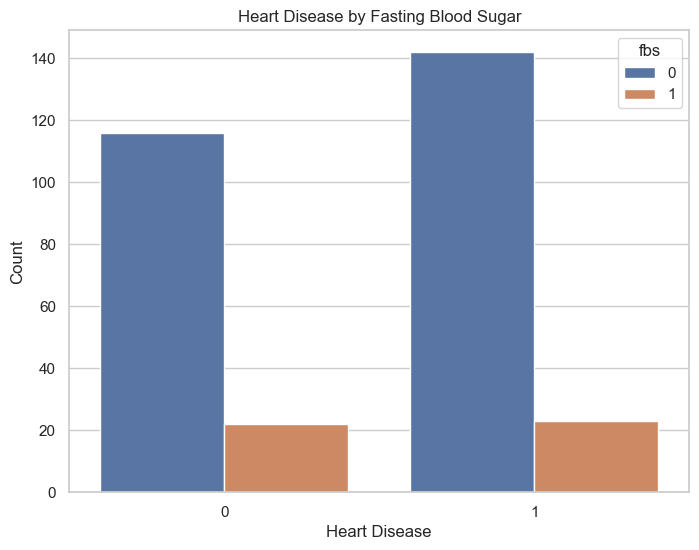

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="fbs", data=df)
plt.title("Heart Disease by Fasting Blood Sugar")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

### Target Distribution wrt exang (Exercise-Induced Angina)

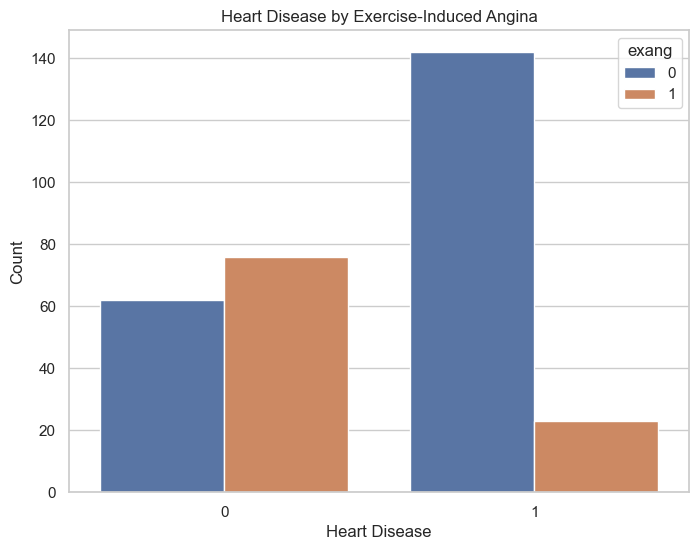

In [21]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exang", data=df)
plt.title("Heart Disease by Exercise-Induced Angina")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

### Findings of Univariate Analysis

Findings of univariate analysis are as follows:-

-	Our feature variable of interest is `target`.

-   It refers to the presence of heart disease in the patient.

-   It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).

- `1` stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

- Similarly, `0` stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

- There are 165 patients suffering from heart disease, and 
   
- There are 138 patients who do not have any heart disease.

- Out of 96 females - 72 have heart disease and 24 do not have heart disease.

- Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

## 9. Bivariate Analysis
**Bivariate analysis studies relationships between two variables:**
- Comparing numerical vs categorical (e.g., age vs target)
- Comparing two numerical variables using scatterplots
- Using groupby to summarize and compare groups



### Estimate correlation coefficients 

The dataset is very small. So, I will compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. 

I will compute it using the `df.corr()` method as follows:-

In [22]:
correlation = df.corr()

In [23]:
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Correlation with Target
The target variable is `target`. So, we should check how each attribute correlates with the `target` variable. We can do it as follows:-

In [24]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

### Interpretation of correlation coefficient

- The correlation coefficient ranges from -1 to +1. 

- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with `target` variable.

- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with `target` variable.

- When it is close to 0, it means that there is no correlation. So, there is no correlation between `target` and `fbs`.

- We can see that the `cp` and `thalach` variables are mildly positively correlated with `target` variable. So, I will analyze the interaction between these features and `target` variable.

### Analysis of cp (Chest Pain Type)

### Check Unique Values

In [25]:
df['cp'].nunique()

4

### Frequency Distribution

In [26]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

- It can be seen that `cp` is a categorical variable and it contains 4 types of values - 0, 1, 2 and 3.

### Visualize cp Distribution

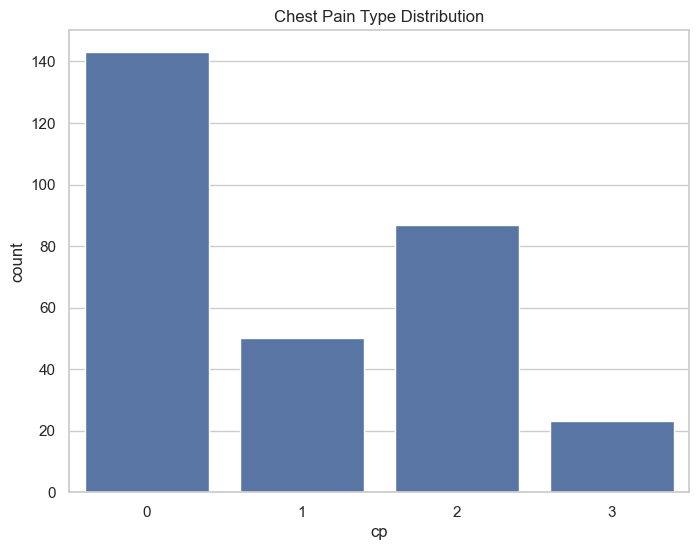

In [27]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", data=df)
plt.title("Chest Pain Type Distribution")
plt.show()

### target vs cp

In [28]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

- `cp` variable contains four integer values 0, 1, 2 and 3.

- `target` variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- So, the above analysis gives `target` variable values categorized into presence and absence of heart disease and groupby `cp` variable values.

- We can visualize this information below.

### Visualize target by cp

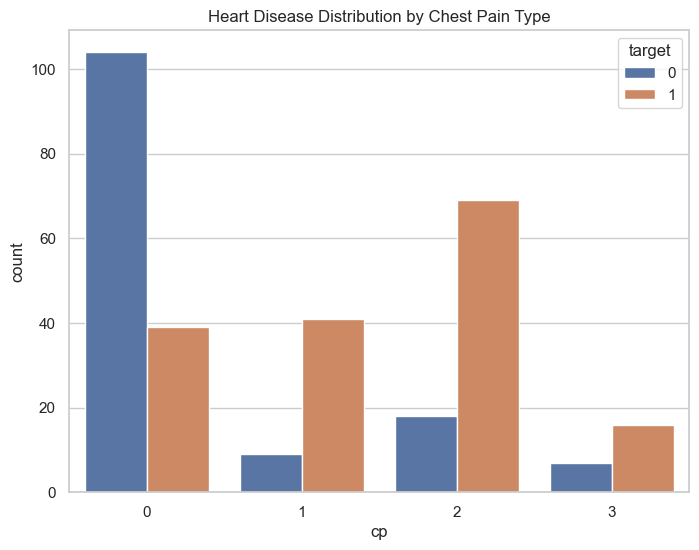

In [29]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", hue="target", data=df)
plt.title("Heart Disease Distribution by Chest Pain Type")
plt.show()

- We can see that the values of `target` variable are plotted wrt `cp`.

- `target` variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- The above plot confirms our above findings, 

### Alternate: target vs cp – Column Format

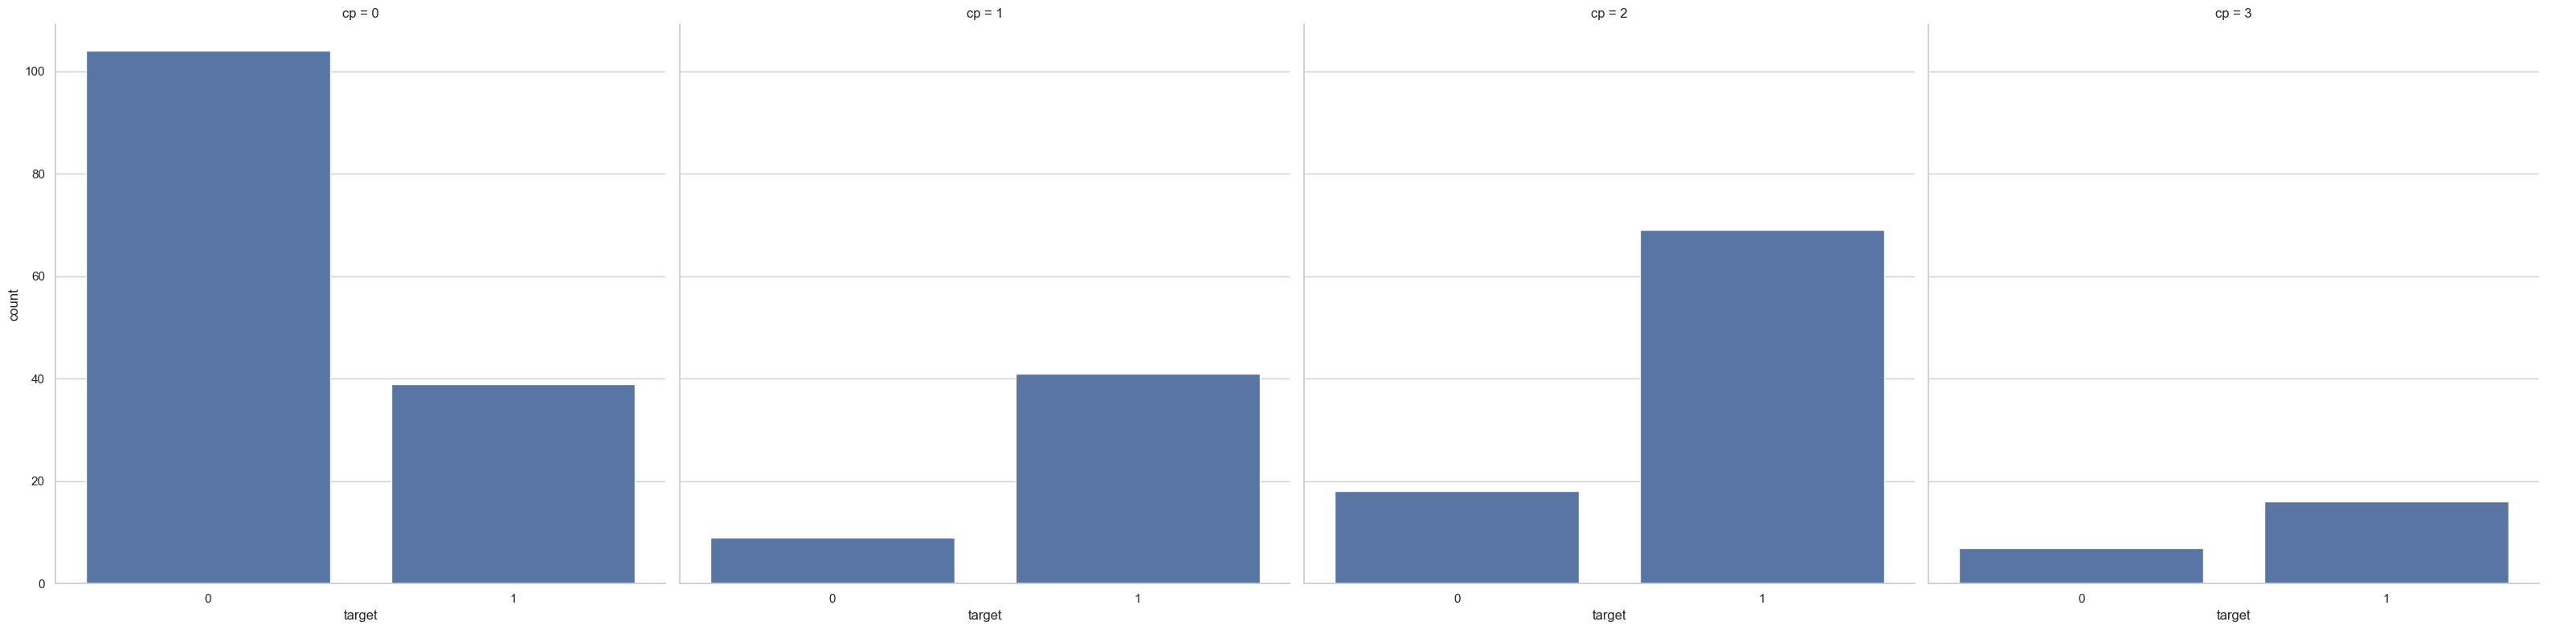

In [30]:
ax = sns.catplot(x="target", col="cp", data=df, kind="count", height=8, aspect=1)
plt.show()

### Analysis of thalach (Max Heart Rate)

- `thalach` stands for maximum heart rate achieved.

- I will check number of unique values in `thalach` variable as follows :

In [31]:
df['thalach'].nunique()

91

- So, number of unique values in `thalach` variable is 91. Hence, it is numerical variable.

- I will visualize its frequency distribution of values as follows :

### Visualize Distribution (Histogram + KDE)

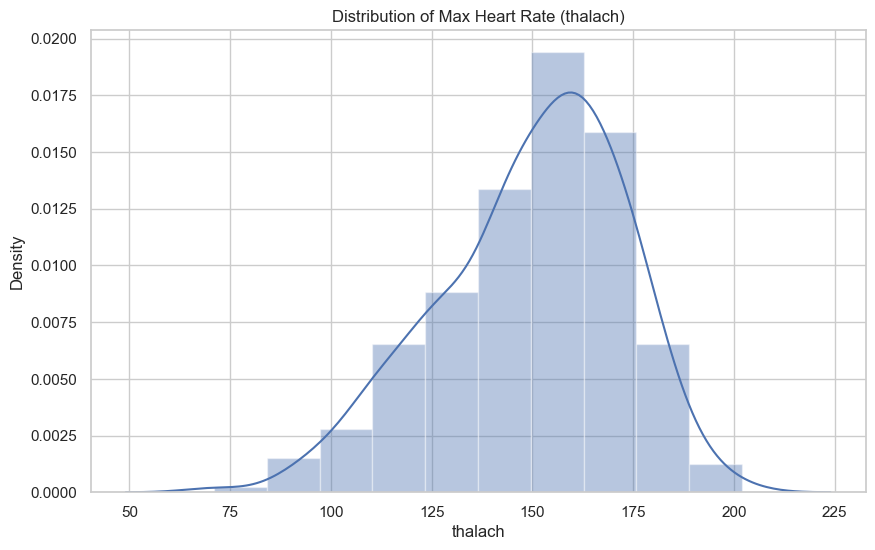

In [32]:
f, ax = plt.subplots(figsize=(10, 6))
x = df['thalach']
ax = sns.distplot(x, bins=10)
plt.title("Distribution of Max Heart Rate (thalach)")
plt.show()

- We can see that the `thalach` variable is slightly negatively skewed.

### Pandas Series Label

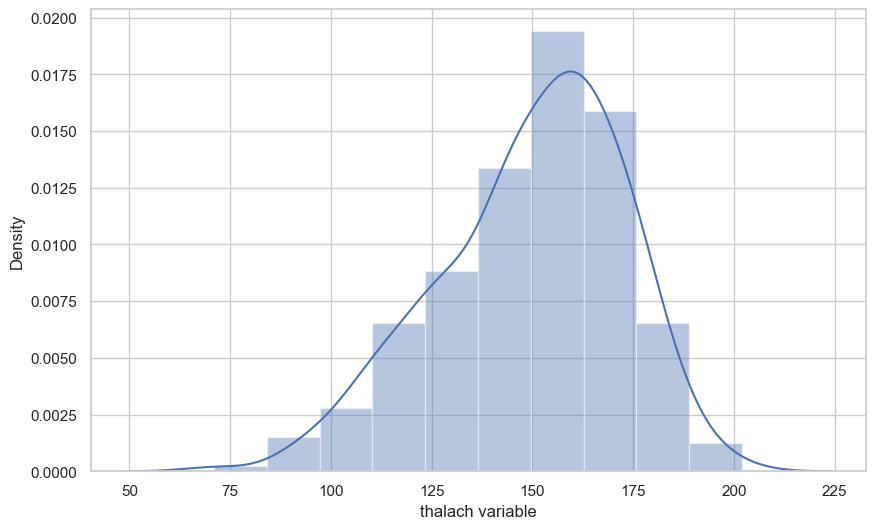

In [33]:
f, ax = plt.subplots(figsize=(10, 6))
x = pd.Series(df['thalach'], name="thalach variable")
ax = sns.distplot(x, bins=10)
plt.show()

### Vertical Histogram

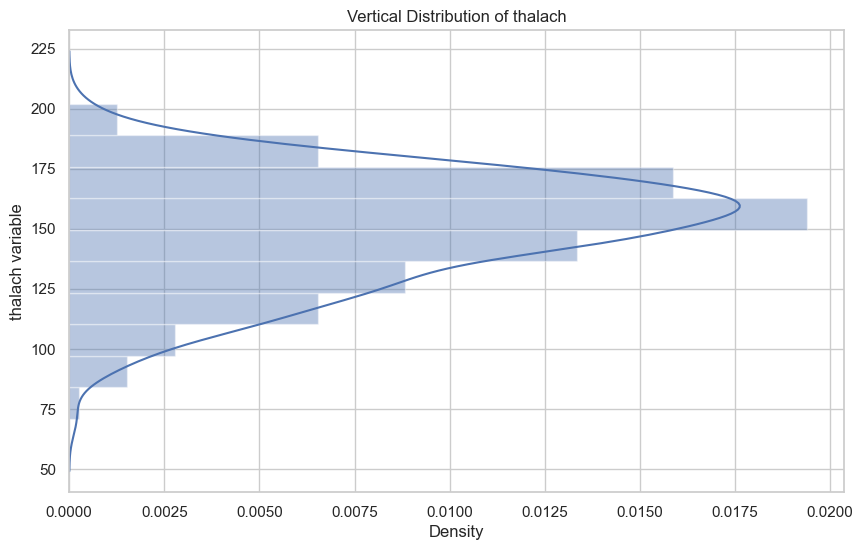

In [34]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(x, bins=10, vertical=True)
plt.title("Vertical Distribution of thalach")
plt.show()

#### Seaborn Kernel Density Estimation (KDE) Plot


- The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.

- The KDE plot plots the density of observations on one axis with height along the other axis.

- We can plot a KDE plot as follows :

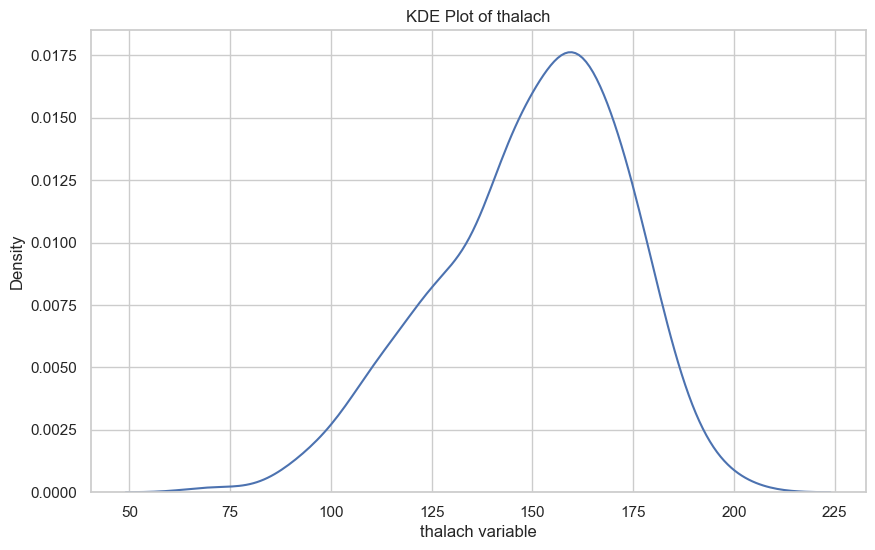

In [35]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.kdeplot(x)
plt.title("KDE Plot of thalach")
plt.show()

### Shaded KDE Plot

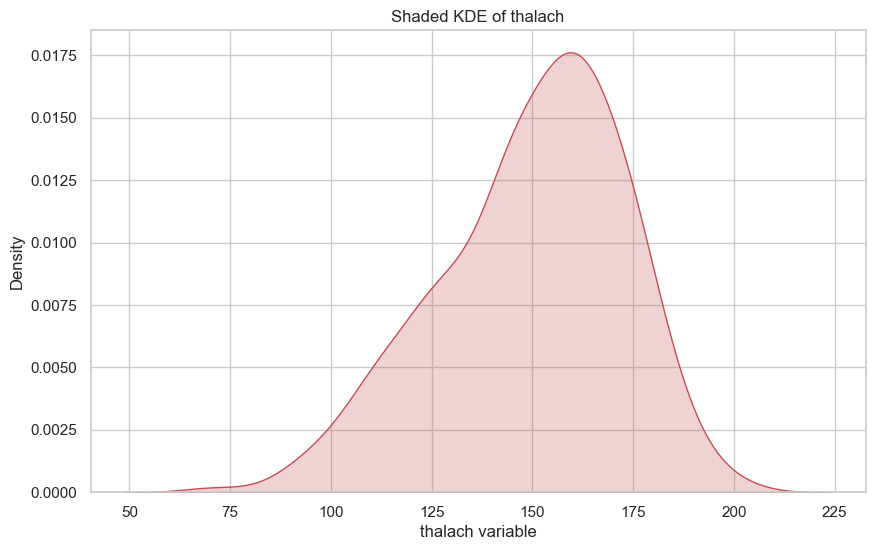

In [36]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.kdeplot(x, shade=True, color='r')
plt.title("Shaded KDE of thalach")
plt.show()

### Histogram

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

- We can plot a histogram as follows :

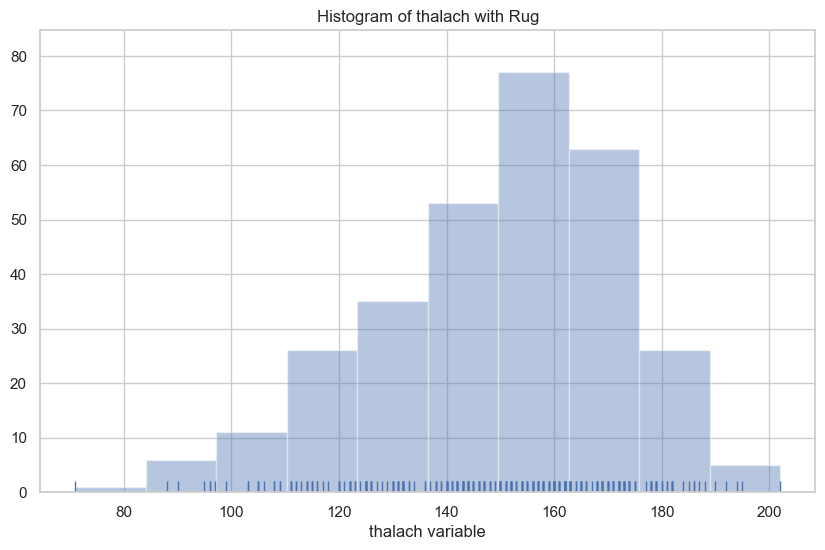

In [37]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.title("Histogram of thalach with Rug")
plt.show()

### thalach vs target – Strip Plot

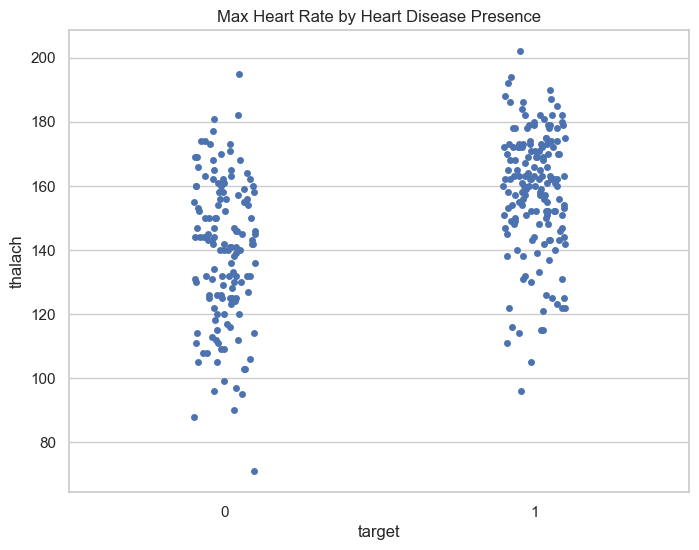

In [38]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df)
plt.title("Max Heart Rate by Heart Disease Presence")
plt.show()

- We can see that those people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

### Strip Plot with Jitter

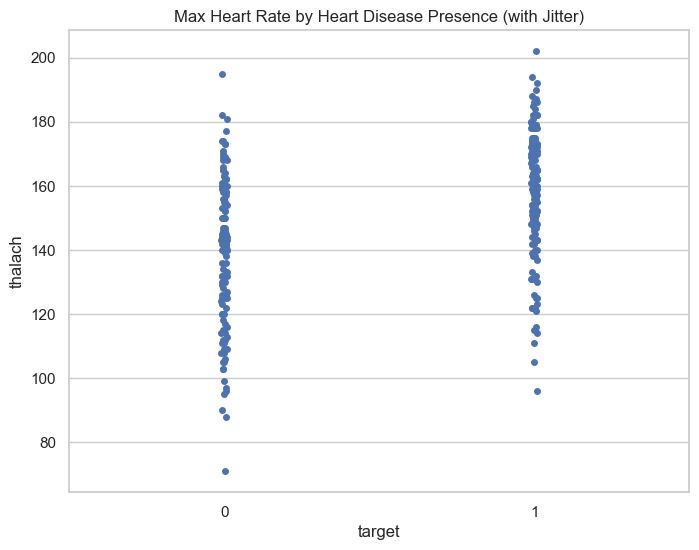

In [39]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df, jitter=0.01)
plt.title("Max Heart Rate by Heart Disease Presence (with Jitter)")
plt.show()

### Boxplot – thalach vs target

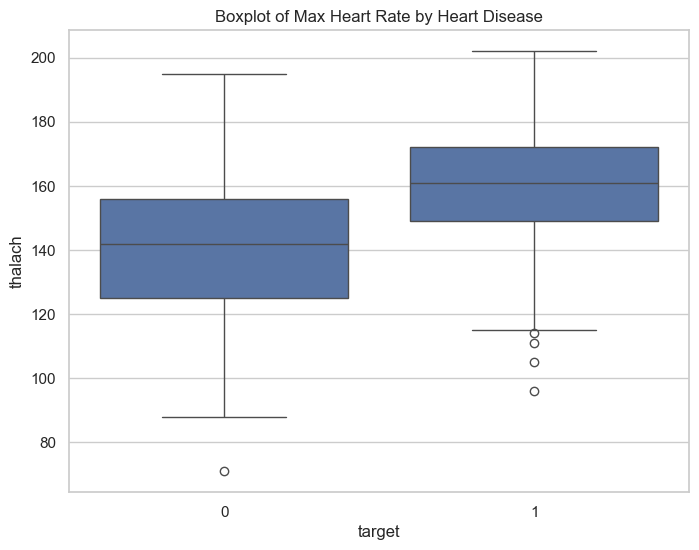

In [40]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.title("Boxplot of Max Heart Rate by Heart Disease")
plt.show()

### Interpretation

The above boxplot confirms our finding that people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

### Findings of Bivariate Analysis

Findings of Bivariate Analysis are as follows –


- There is no variable which has strong positive correlation with `target` variable.

- There is no variable which has strong negative correlation with `target` variable.

- There is no correlation between `target` and `fbs`.

- The `cp` and `thalach` variables are mildly positively correlated with `target` variable. 

- We can see that the `thalach` variable is slightly negatively skewed.

- The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

- The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).


## 10. Multivariate Analysis

- Involves the simultaneous analysis of three or more variables.
- Useful for finding complex patterns and interactions.
- Tools: pairplots, heatmaps, 3D plots, advanced statistical models.

The objective of multivariate analysis is to discover hidden patterns and relationships between multiple variables in the dataset.

### Discover patterns and relationships

- An important step in EDA is to discover patterns and relationships between variables in the dataset. 

- I will use `heat map` and `pair plot` to discover the patterns and relationships in the dataset.

- First of all, I will draw a `heat map`.

### Correlation Heatmap

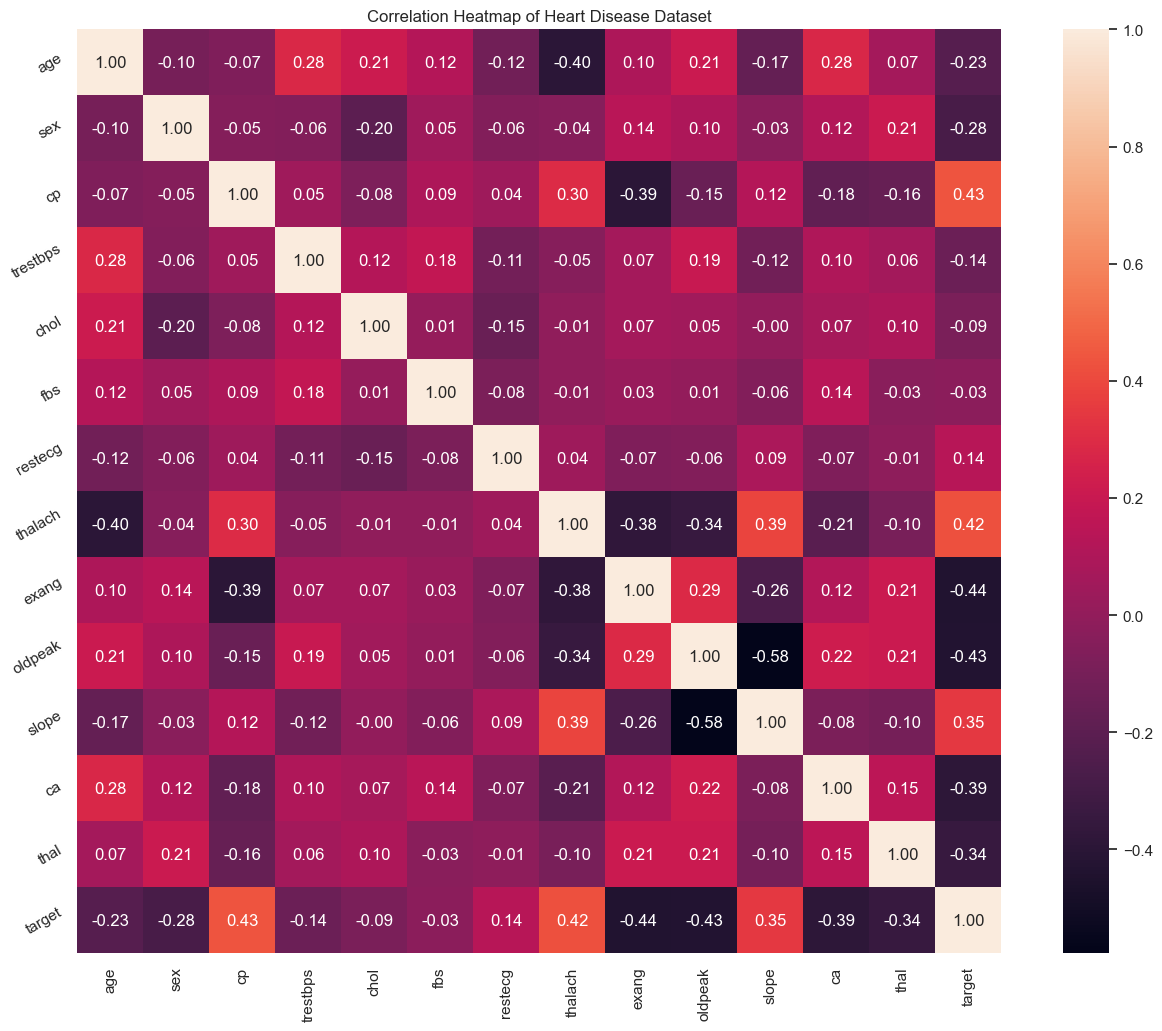

In [41]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

#### Interpretation

From the above correlation heat map, we can conclude that :-

- `target` and `cp` variable are mildly positively correlated (correlation coefficient = 0.43).

- `target` and `thalach` variable are also mildly positively correlated (correlation coefficient = 0.42).

- `target` and `slope` variable are weakly positively correlated (correlation coefficient = 0.35).

- `target` and `exang` variable are mildly negatively correlated (correlation coefficient = -0.44).

- `target` and `oldpeak` variable are also mildly negatively correlated (correlation coefficient = -0.43).

- `target` and `ca` variable are weakly negatively correlated (correlation coefficient = -0.39).

- `target` and `thal` variable are also waekly negatively correlated (correlation coefficient = -0.34).



### Pair Plot

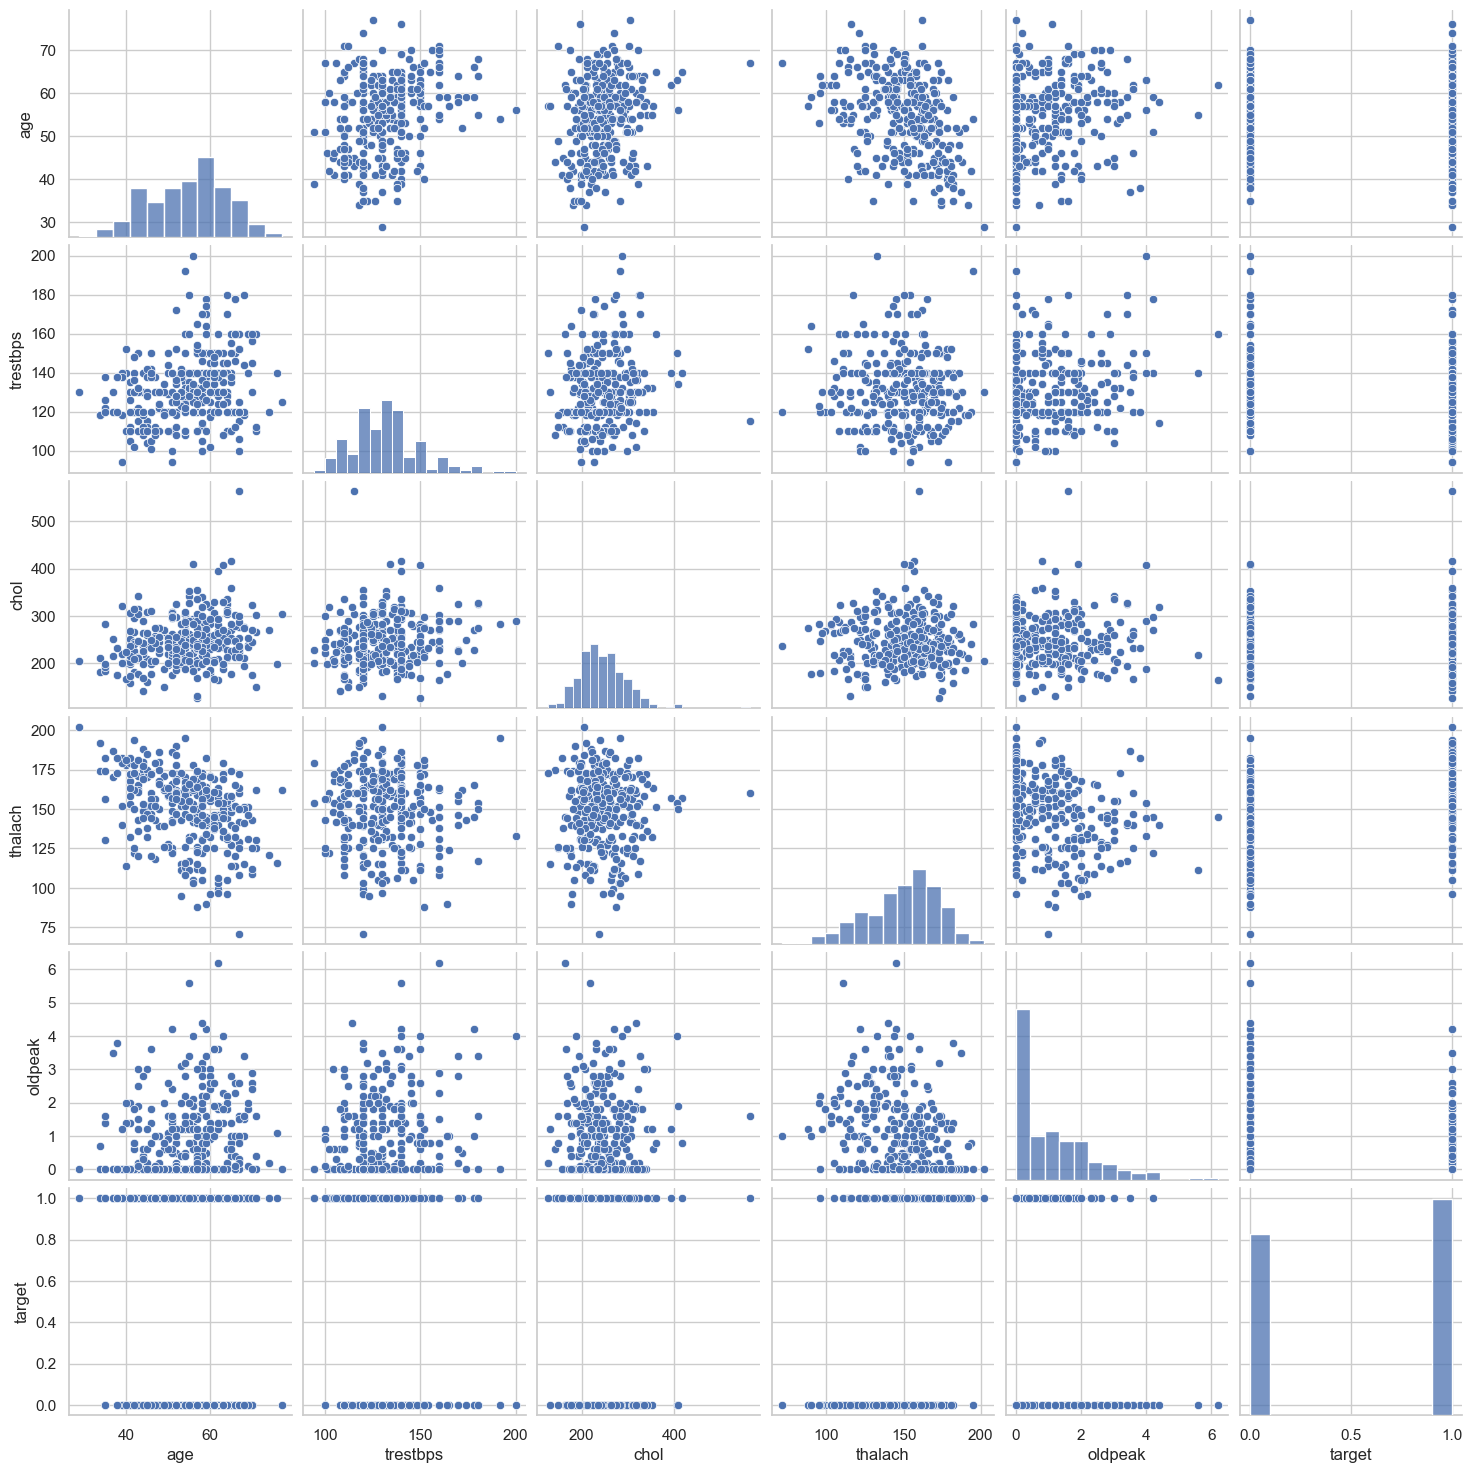

In [42]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

- I have defined a variable `num_var`. Here `age`, `trestbps`, ``chol`, `thalach` and `oldpeak`` are numerical variables and `target` is the categorical variable.

- So, I wll check relationships between these variables.

### Analysis of `age` and other variables

#### Check the number of unique values in `age` variable

In [43]:
df['age'].nunique()

41

#### View statistical summary of `age` variable

In [44]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

#### Interpretation

- The mean value of the `age` variable is 54.37 years.

- The minimum and maximum values of `age` are 29 and 77 years.

### Distribution Plot

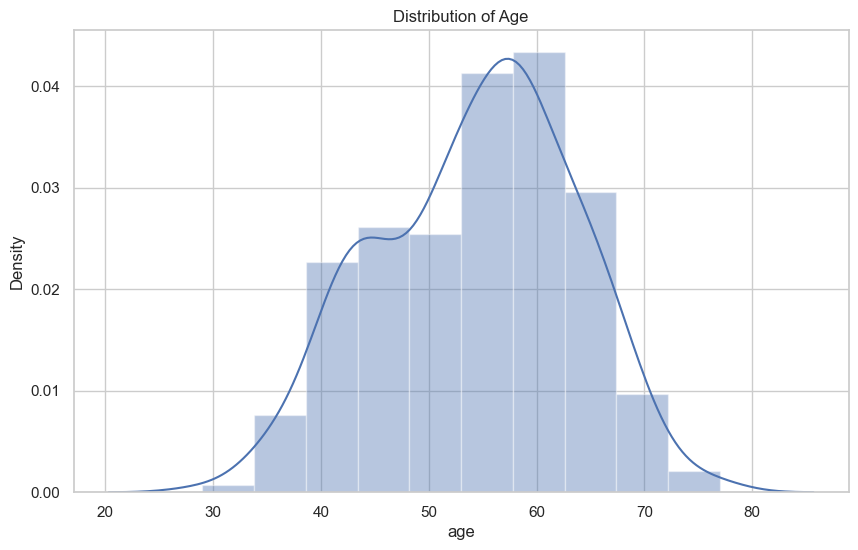

In [45]:
f, ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.title("Distribution of Age")
plt.show()

#### Interpretation

- The `age` variable distribution is approximately normal.

### Age vs Target

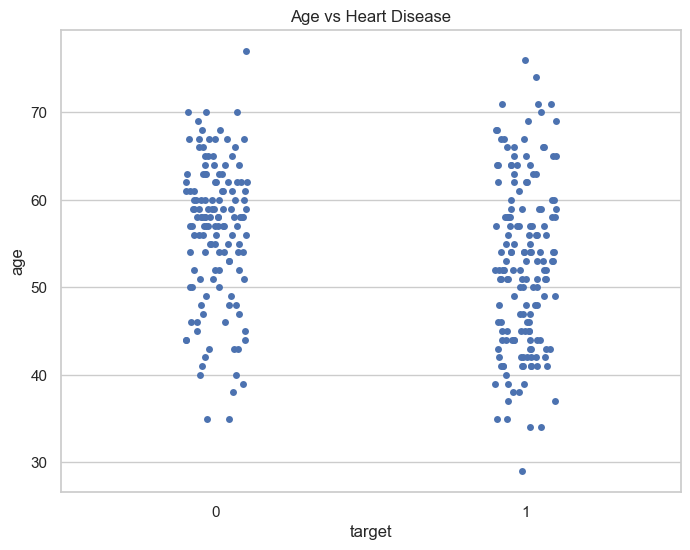

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="age", data=df)
plt.title("Age vs Heart Disease")
plt.show()

#### Interpretation

- We can see that the people suffering from heart disease (target = 1) and people who are not suffering from heart disease (target = 0) have comparable ages.

### age vs target with boxplot

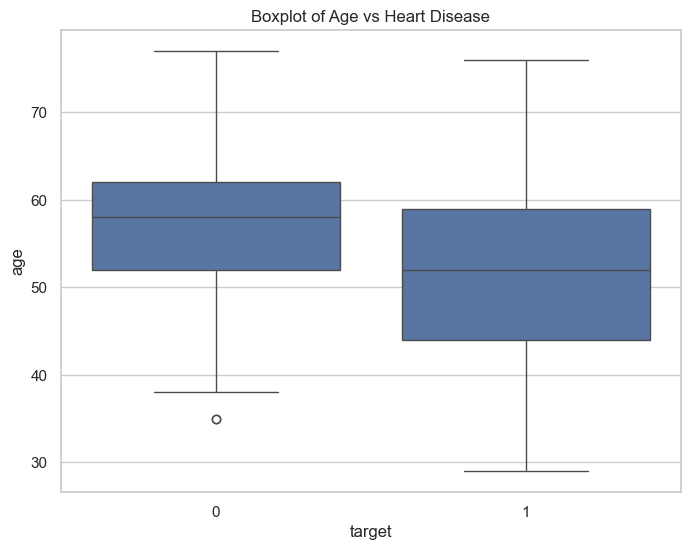

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.title("Boxplot of Age vs Heart Disease")
plt.show()

#### Interpretation

- The above boxplot tells two different things :

  - The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.
  
  - The dispersion or spread of age of the people who have heart disease is greater than the dispersion or spread of age of the people who do not have heart disease.


### Age vs Trestbps (Resting BP)

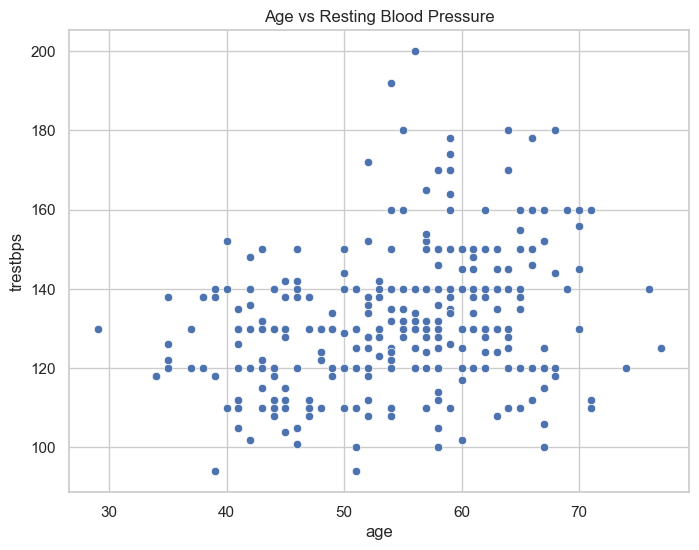

In [48]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="trestbps", data=df)
plt.title("Age vs Resting Blood Pressure")
plt.show()

#### Interpretation

- The above scatter plot shows that there is no correlation between `age` and `trestbps` variable.

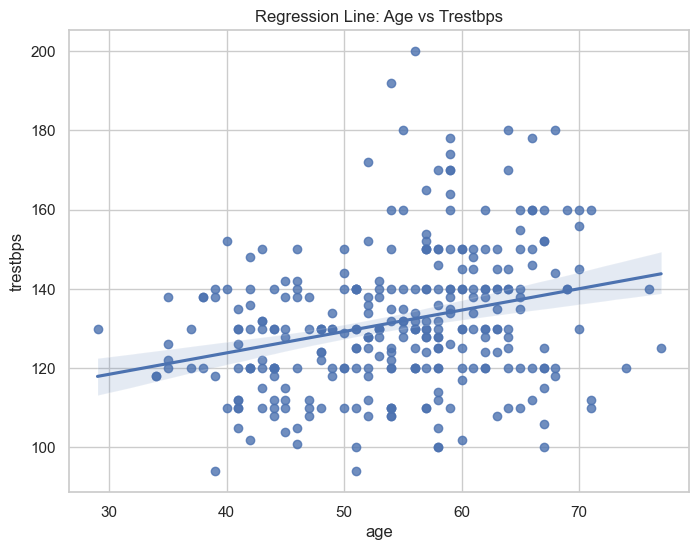

In [49]:
# With Regression Line
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.title("Regression Line: Age vs Trestbps")
plt.show()

#### Interpretation

- The above line shows that linear regression model is not good fit to the data.

### Age vs Chol (Cholesterol)

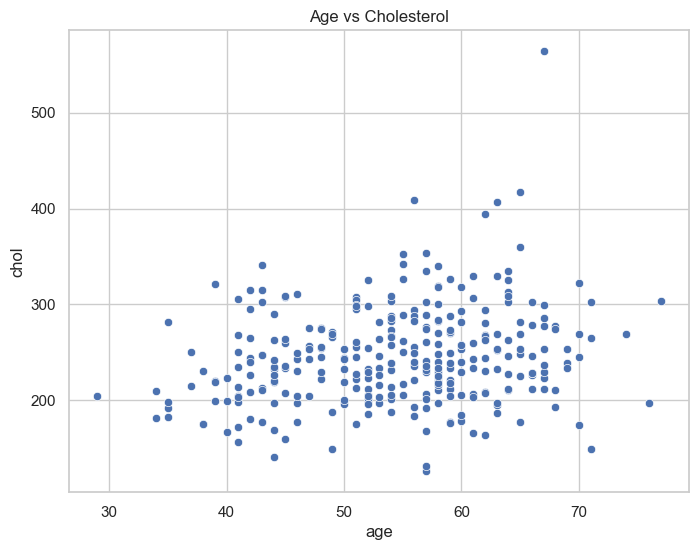

In [50]:
# Scatter Plot
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=df)
plt.title("Age vs Cholesterol")
plt.show()

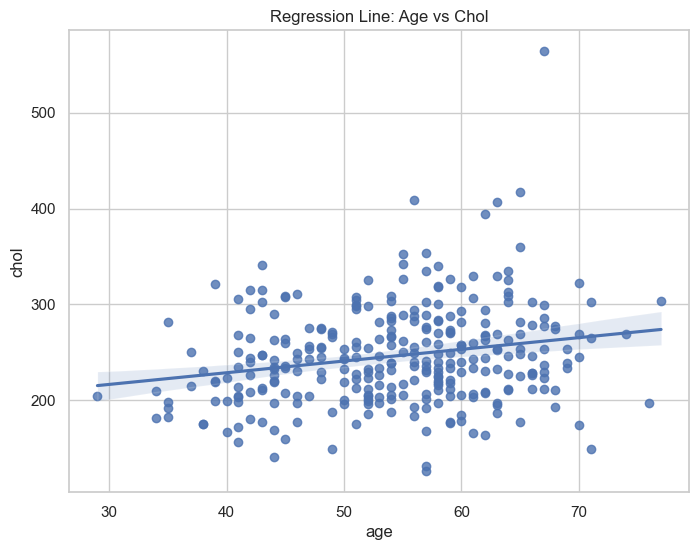

In [51]:
# With Regression Line
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.title("Regression Line: Age vs Chol")
plt.show()

#### Interpretation

- The above plot confirms that there is a slighly positive correlation between `age` and `chol` variables.

### Chol vs Thalach

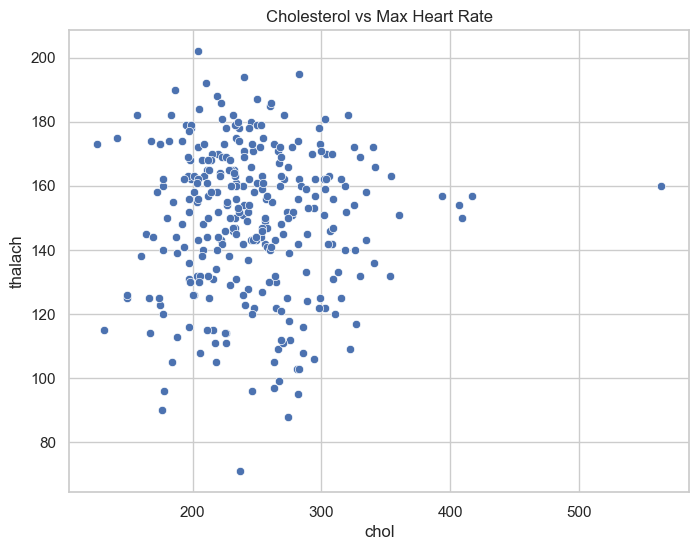

In [52]:
# Scatter Plot
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="chol", y="thalach", data=df)
plt.title("Cholesterol vs Max Heart Rate")
plt.show()

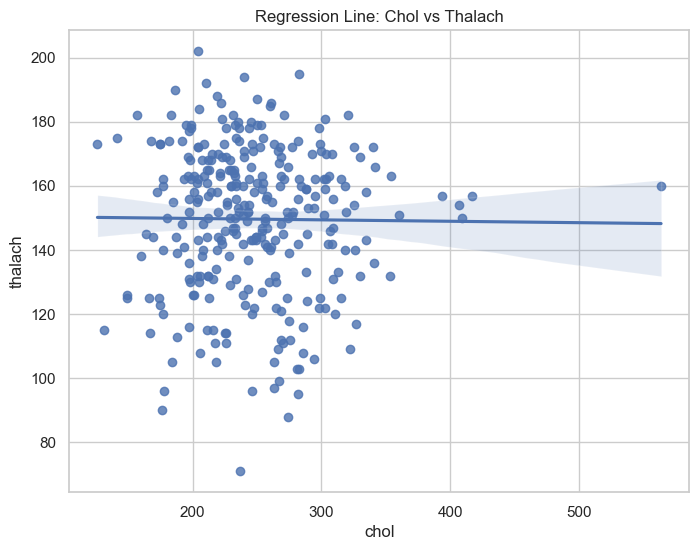

In [53]:
# With Regression Line
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.title("Regression Line: Chol vs Thalach")
plt.show()

#### Interpretation


- The above plot shows that there is no correlation between `chol` and `thalach` variable.

## 11. Dealing with missing values 

-	In Pandas missing data is represented by two values:

  -	**None**: None is a Python singleton object that is often used for missing data in Python code.
  
  -	**NaN** : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.

-  There are different methods in place on how to detect missing values.


### Pandas isnull() and notnull() functions 

- Pandas offers two functions to test for missing data - `isnull()` and `notnull()`. These are simple functions that return a boolean value indicating whether the passed in argument value is in fact missing data.

-  Below, I will list some useful commands to deal with missing values.


### Useful commands to detect missing values 

-	**df.isnull()**

The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False.


-	**df.isnull().sum()**

The above command returns total number of missing values in each column in the dataframe.


-	**df.isnull().sum().sum()** 

It returns total number of missing values in the dataframe.


-	**df.isnull().mean()**

It returns percentage of missing values in each column in the dataframe.


-	**df.isnull().any()**

It checks which column has null values and which has not. The columns which has null values returns TRUE and FALSE otherwise.

-	**df.isnull().any().any()**

It returns a boolean value indicating whether the dataframe has missing values or not. If dataframe contains missing values it returns TRUE and FALSE otherwise.


-	**df.isnull().values.any()**

It checks whether a particular column has missing values or not. If the column contains missing values, then it returns TRUE otherwise FALSE.


-	**df.isnull().values.sum()**


It returns the total number of missing values in the dataframe.



In [54]:
# Check missing values per column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Interpretation

We can see that there are no missing values in the dataset.

## Check with ASSERT statement

- We must confirm that our dataset has no missing values. 

- We can write an **assert statement** to verify this. 

- We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present. 

- This gives us confidence that our code is running properly.

- **Assert statement** will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

- **Asserts**

  - assert 1 == 1 (return Nothing if the value is True)

  - assert 1 == 2 (return AssertionError if the value is False)

In [55]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()

This statement checks that no NaN or None values exist in the entire DataFrame.

In [56]:
#assert all values are greater than or equal to 0

assert (df >= 0).all().all()

This checks that no negative values exist in the dataset.

#### Interpretation

- The above two commands do not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset. 

- All the values are greater than or equal to zero.

## 12. Outlier Detection

I will use boxplots to visually detect outliers in the continuous numerical variables:

`age`, `trestbps`, `chol`, `thalach` and  `oldpeak` variables.

### `age` variable

In [57]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

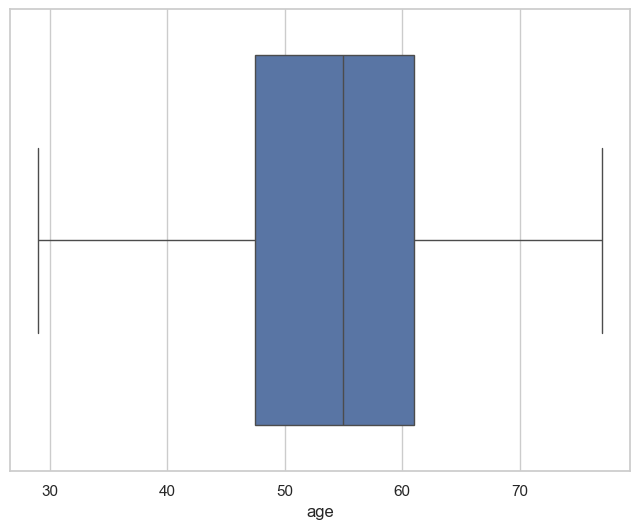

In [58]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["age"])
plt.show()

### `trestbps` variable

In [59]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

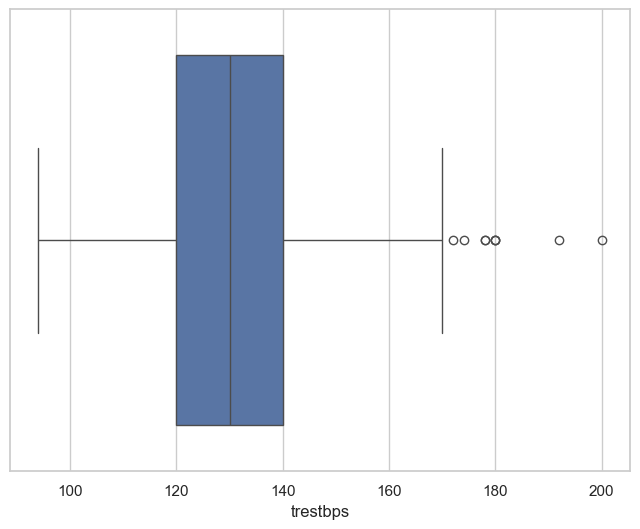

In [60]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["trestbps"])
plt.show()

### `chol` variable

In [61]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

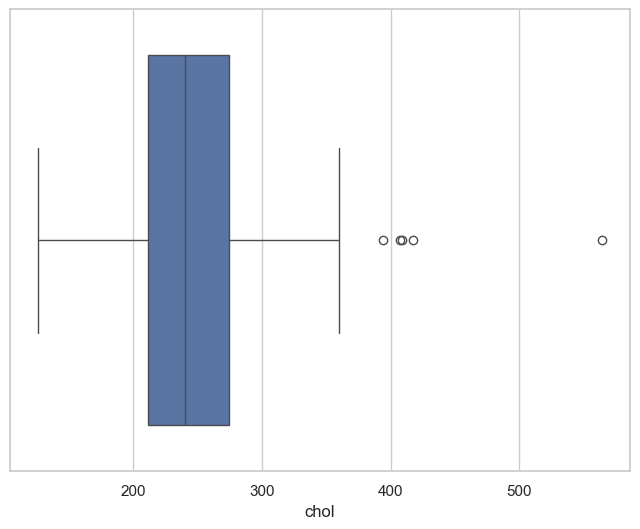

In [62]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["chol"])
plt.show()

### `thalach` variable

In [63]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

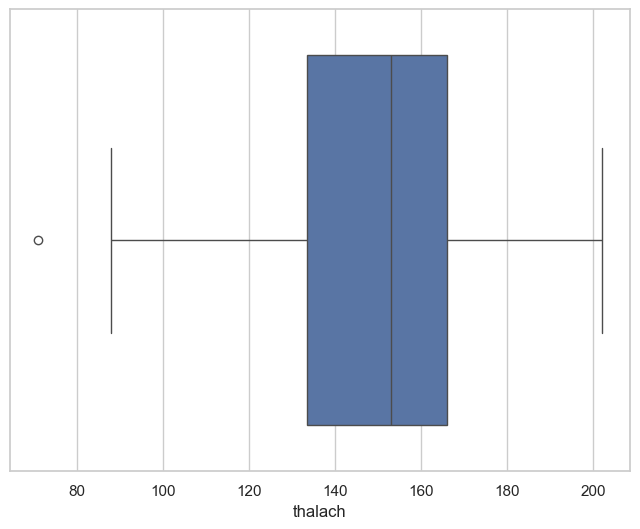

In [64]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["thalach"])
plt.show()

### `oldpeak` variable

In [65]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

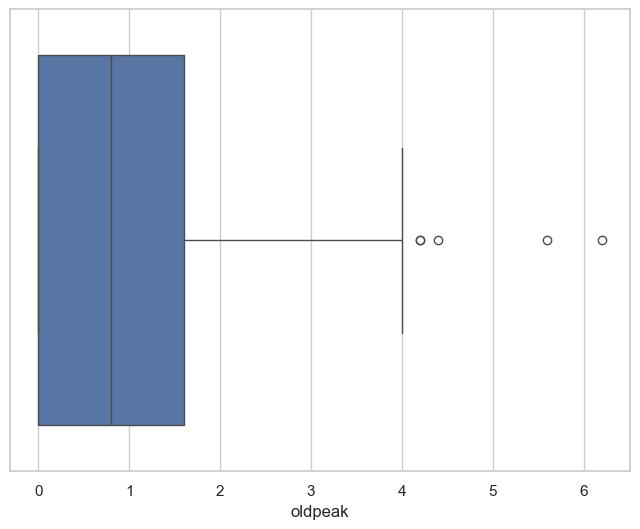

In [66]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["oldpeak"])
plt.show()

#### Findings

- The `age` variable does not contain any outlier.

- `trestbps` variable contains outliers to the right side.

- `chol` variable also contains outliers to the right side.

- `thalach` variable contains a single outlier to the left side.

- `oldpeak` variable contains outliers to the right side.

- Those variables containing outliers needs further investigation.


---

## 13. Conclusion

In this notebook, I have explored the heart disease dataset and implemented many of the strategies presented in the book **Think Stats - Exploratory Data Analysis in Python by Allen B Downey** . 

**Main Takeaways:**
- Examined the target variable to understand its distribution and characteristics.
- Explored its relationships with other features through univariate, bivariate, and multivariate approaches.
- Leveraged multiple visualization techniques including histograms, box plots, scatter plots, and correlation heatmaps.
- Identified and assessed missing data using the isnull() method.
- Applied assertions to ensure the accuracy and consistency of the dataset.
- Conducted outlier analysis and documented the most important observations.
